## Coursera Data Science Capstone Project - Student Housing & nearby facilities in Exeter, UK

## Table of contents

<a href='#Intro'>Introduction - Business Problem</a>   
<a href='#Data'>Data Sources</a>      
<a href='#Method'>Methodology</a>   
<a href='#Results'>Results and Discussion</a>   
<a href='#Conclusion'>Conclusion</a> 

<a id='Intro'></a>
### Introduction - Business Problem 
 
Exeter University provides Student Halls for students to live in for their first year at university.   For subsequent years of study students find houses in the city to rent, in groups which typically range from 3 to 7 students but can be larger, depending on the accommodation available.  

There are some specific regulations for shared housing based on the number of unrelated people sharing a property and the number of floors in the property.  This is because research has shown a much higher fire risk for this type of housing.  The legislation means that ‘Houses of Multiple Occupancy’ (HMOs) must have a licence, and the licence confirms the number of people that can live in the house.     The owner also has to comply with more stringent fire regulations (eg fire doors and walls with higher fire resistency).     Each local council has to maintain and publish a public register of HMOs for their town/city. This legislation makes the properties safer, but also incurs extra costs for the Landlord, and can reduce the housing supply.  

It is currently very hard for students to identify properties that are available for rent – this is because they are rented out via a variety of different agencies, privately direct from the Landlord, or promoted at the annual ‘Student Housing Fair’.   This results in many students racing each other to look at houses as they become available and making decisions quickly in order to secure the properties.     Some properties are only found by walking around the student areas and looking for signs that the property is available to let as a student house – posted up on a piece of paper in the window – but as students are new to the city, they often don’t know which streets are likely to have student houses in.  

There is no central place where students can see which locations the student houses are in, and they tend to become available in small numbers between October (ie one month after the students have started at university, living in Halls), and June the following year – with contracts starting typically in July, August and September in time for the second academic year at university.  

As a result, students tend to panic that they will not find a suitable property, with the right number of bedrooms for their friendship group.  They often end up quickly choosing a property in a poor location just to secure a house, and then later on in the academic year, discovering there were better choices available later on.  

Because the students are also fairly new to the city at the time they are seeking second year accommodation, they also don’t have a good sense of where is a good place to live.  Generally, accommodation needs to be close to the university of course, but some students would also prioritise living close to social venues – such as pubs and nightclubs, whereas others might prefer to be nearing to sports facilities or train stations to get to the beach or for visits home.  

<a id='Data'></a>
### Data Sources  
  
For this project I will be using Foursquare data for the city of Exeter.     

Information about Exeter postcodes and Wards is available online, so I will use that data to identify which Wards (Neighbourhood) and Postcodes are the closest to the university and therefore the logical area of the city for students to live.  

I will also be using the HMO Register – public data provided by Exeter City Council to map the location of the Houses of Multiple Occupancy in relation to the university.    Not all HMOs are student houses, but most are.  

I will also be looking to map information about other relevant facilities – such as cafes, pubs, bars, supermarkets, train stations, parks and sports facilities – which could help students identify which areas of the city would suit their requirements the most.  

Once this data has been mapped, then it should be possible to identify where in the city has student houses, and what other facilities are nearby, to help students identify the best place for them to live.  

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Set up the environment

In [2]:
#import libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import html5lib
import requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # transform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

! pip install folium==0.5.0
import folium # plotting library
from folium.plugins import MarkerCluster

Solving environment: done

# All requested packages already installed.

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


### Import CSV file with Exeter postcodes

In [3]:
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

#[credentials removed from here]

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

strings = {'In Use?':str}
    
postcodes = pd.read_csv(body, dtype=strings)
postcodes.head()

Postcode In Use?   Latitude  Longitude  Easting  Northing  Grid Ref  \
0  EX1 1AA      No  50.723724  -3.527604   292269     92680  SX922926   
1  EX1 1AB      No  50.721507  -3.527929   292241     92434  SX922924   
2  EX1 1AD      No  50.722992  -3.528558   292200     92600  SX921925   
3  EX1 1AE     Yes  50.722796  -3.531867   291966     92583  SX919925   
4  EX1 1AF     Yes  50.720517  -3.527982   292235     92324  SX922923   

         Ward                   Parish  Introduced  Terminated  Altitude  \
0  St David's  Exeter, unparished area  1990-02-01  2005-10-01        47   
1  St David's  Exeter, unparished area  1999-12-01  2006-10-01        40   
2  St David's  Exeter, unparished area  1980-01-01  1991-12-01        45   
3  St David's  Exeter, unparished area  2008-08-01         NaN        45   
4  St David's  Exeter, unparished area  2010-01-01         NaN        37   

   Country Last Updated                                            Quality  \
0  England   2021-05-21  Within the building of the matched address clo...   
1  England   2021-05-21  Within the building of the matched address clo...   
2  England   2021-05-21  Postcode terminated prior to Gridlink initiati...   
3  England   2021-05-21  Within the building of the matched address clo...   
4  England   2021-05-21  Within the building of the matched address clo...   

   LSOA Code    LSOA Name  
0  E01020016  Exeter 008C  
1  E01020016  Exeter 008C  
2  E01020016  Exeter 008C  
3  E01020016  Exeter 008C  
4  E01020016  Exeter 008C

In [4]:
# Keep only those postcodes still In Use.

postcodes = postcodes.loc[postcodes['In Use?'] == ('Yes')]
postcodes.head()

Postcode In Use?   Latitude  Longitude  Easting  Northing  Grid Ref  \
3  EX1 1AE     Yes  50.722796  -3.531867   291966     92583  SX919925   
4  EX1 1AF     Yes  50.720517  -3.527982   292235     92324  SX922923   
7  EX1 1AJ     Yes  50.723094  -3.528986   292170     92612  SX921926   
8  EX1 1AL     Yes  50.720083  -3.531608   291978     92281  SX919922   
9  EX1 1AN     Yes  50.720355  -3.531461   291989     92311  SX919923   

         Ward                   Parish  Introduced Terminated  Altitude  \
3  St David's  Exeter, unparished area  2008-08-01        NaN        45   
4  St David's  Exeter, unparished area  2010-01-01        NaN        37   
7  St David's  Exeter, unparished area  2011-05-01        NaN        46   
8  St David's  Exeter, unparished area  2013-05-01        NaN        28   
9  St David's  Exeter, unparished area  2012-12-01        NaN        30   

   Country Last Updated                                            Quality  \
3  England   2021-05-21  Within the building of the matched address clo...   
4  England   2021-05-21  Within the building of the matched address clo...   
7  England   2021-05-21  Within the building of the matched address clo...   
8  England   2021-05-21  Within the building of the matched address clo...   
9  England   2021-05-21  Within the building of the matched address clo...   

   LSOA Code    LSOA Name  
3  E01020016  Exeter 008C  
4  E01020016  Exeter 008C  
7  E01020016  Exeter 008C  
8  E01020016  Exeter 008C  
9  E01020016  Exeter 008C

In [5]:
# Check how many postcodes there are in each ward.
postcodes['Ward'].value_counts()

St David's                  491
Newtown and St Leonard's    367
Alphington                  300
Topsham                     285
Duryard and St James        283
St Loyes                    277
Pinhoe                      264
St Thomas                   242
Priory                      237
Heavitree                   217
Mincinglake and Whipton     211
Pennsylvania                210
Exwick                      201
Name: Ward, dtype: int64

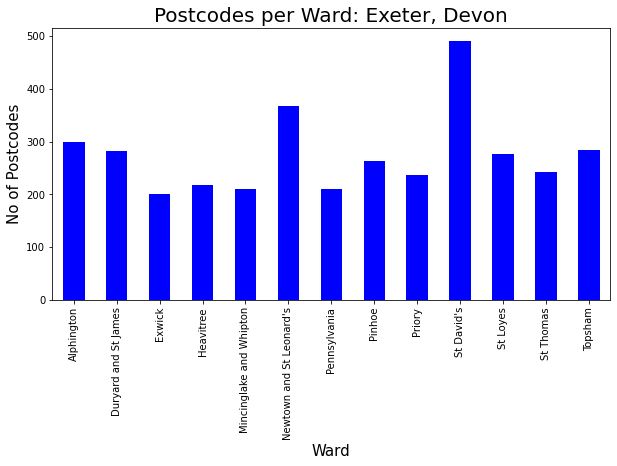

In [6]:
# Show the number of postcodes in each ward (neighbourhood)
postcodes.groupby('Ward')['Postcode'].count().plot.bar(figsize=(10,5), color="blue")
plt.title('Postcodes per Ward: Exeter, Devon', fontsize = 20)
plt.xlabel('Ward', fontsize = 15)
plt.ylabel('No of Postcodes',fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

In [7]:
# Remove unnecessary columns from the dataframe 
postcodes.drop(columns =['Introduced','Terminated','Country','Last Updated','Quality','Easting','Northing', 'Grid Ref', 
                         'Parish','Altitude','LSOA Code','LSOA Name', 'In Use?'], axis=1,inplace=True)
postcodes.head()

Postcode   Latitude  Longitude        Ward
3  EX1 1AE  50.722796  -3.531867  St David's
4  EX1 1AF  50.720517  -3.527982  St David's
7  EX1 1AJ  50.723094  -3.528986  St David's
8  EX1 1AL  50.720083  -3.531608  St David's
9  EX1 1AN  50.720355  -3.531461  St David's

### Visualise the Postcodes near the University of Exeter & the City Centre

In [8]:
# Obtain the coordinates for Exeter
address = 'Exeter, Devon'

geolocator = Nominatim(user_agent="exeter_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Exeter are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Exeter are 50.7255794, -3.5269497.


In [9]:
# Obtain the coordinates for Exeter University
address = 'Exeter University, Devon'

geolocator = Nominatim(user_agent="exuni_explorer")
location = geolocator.geocode(address)
unilatitude = location.latitude
unilongitude = location.longitude
print('The geograpical coordinate of Exeter University, Exeter, Devon are {}, {}.'.format(unilatitude, unilongitude))

The geograpical coordinate of Exeter University, Exeter, Devon are 50.7369302, -3.536476717021671.


In [10]:
# Obtain the coordinates for St Luke's Campus, Exeter University
address = "St Luke's Campus,Exeter, Devon"

geolocator = Nominatim(user_agent="exeter_explorer")
location = geolocator.geocode(address)
stllatitude = location.latitude
stllongitude = location.longitude
print("The geograpical coordinates of St Luke's Campus, Exeter are {}, {}.".format(latitude, longitude))

The geograpical coordinates of St Luke's Campus, Exeter are 50.7255794, -3.5269497.


In [11]:
map_exeter = folium.Map(location=[latitude, longitude], zoom_start=13)

marker_cluster = MarkerCluster().add_to(map_exeter)

for lat,lng, postcode, in zip(postcodes['Latitude'], postcodes['Longitude'], postcodes['Postcode']):
    folium.Marker(location=[lat,lng], popup = postcode).add_to(marker_cluster)

folium.Marker(
        location = [latitude, longitude],
        popup="City Centre",
        icon=folium.Icon(color='blue', icon='star', prefix='fa'),
        ).add_to(map_exeter)
    
folium.Marker(
        location = [unilatitude, unilongitude],
        popup="Exeter University",
        icon=folium.Icon(color='red', icon='university', prefix='fa'),
        ).add_to(map_exeter)

folium.Marker(
        location = [stllatitude, stllongitude],
        popup="St Lukes Campus",
        icon=folium.Icon(color='purple', icon='university', prefix='fa'),
        ).add_to(map_exeter)
    
map_exeter

### Identify the Latitude and Longitude for each Ward (Neighbourhood) in Exeter


In [12]:
# Create a dataframe
data = {'Ward':["Alphington","Duryard","St James","Exwick","Heavitree","Mincinglake and Whipton","Newtown","St Leonards","Pennsylvania","Pinhoe","Priory",
                "St Davids","St Loyes","St Thomas","Topsham"],
       'Ward Full':["Alphington, Exeter, Devon","Duryard, Exeter, Devon","St James, Exeter, Devon","Exwick, Exeter, Devon","Heavitree, Exeter, Devon","Mincinglake and Whipton, Exeter, Devon",
                "Newtown, Exeter, Devon","St Leonard's, Exeter, Devon","Pennsylvania, Exeter, Devon","Pinhoe, Exeter, Devon","Priory, Exeter, Devon",
                "St David's, Exeter, Devon","St Loyes, Exeter, Devon","St Thomas, Exeter, Devon","Topsham, Exeter, Devon"],}
wards = pd.DataFrame(data)
wards.head()       
        

Ward                  Ward Full
0  Alphington  Alphington, Exeter, Devon
1     Duryard     Duryard, Exeter, Devon
2    St James    St James, Exeter, Devon
3      Exwick      Exwick, Exeter, Devon
4   Heavitree   Heavitree, Exeter, Devon

In [13]:
# use geolocator to pull the Co-ordinates and then split them out into Latitude and Longitude
columns_add = ['Co-ordinates']
for newcol in columns_add:
               wards[newcol]=None
wards["Co-ordinates"] = wards["Ward Full"].apply(geolocator.geocode)
wards["point"]= wards["Co-ordinates"].apply(lambda loc: tuple(loc.point) if loc else None)
wards[['lat', 'lng', 'altitude']] = pd.DataFrame(wards['point'].to_list(), index=wards.index)
wards.head()

Ward                  Ward Full  \
0  Alphington  Alphington, Exeter, Devon   
1     Duryard     Duryard, Exeter, Devon   
2    St James    St James, Exeter, Devon   
3      Exwick      Exwick, Exeter, Devon   
4   Heavitree   Heavitree, Exeter, Devon   

                                        Co-ordinates  \
0  (Alphington, Exeter, Devon, South West England...   
1  (Duryard, Exwick, Exeter, Devon, South West En...   
2  (St James, Prince Charles Road, Stoke Hill, Ex...   
3  (Exwick, Exeter, Devon, South West England, En...   
4  (Heavitree, Exeter, Devon, South West England,...   

                                    point        lat       lng  altitude  
0           (50.7002282, -3.5356744, 0.0)  50.700228 -3.535674       0.0  
1  (50.74027375, -3.545111665806209, 0.0)  50.740274 -3.545112       0.0  
2    (50.7341668, -3.51560196461039, 0.0)  50.734167 -3.515602       0.0  
3           (50.7321721, -3.5501132, 0.0)  50.732172 -3.550113       0.0  
4           (50.7218485, -3.5032797, 0.0)  50.721849 -3.503280       0.0

### Show a map of Exeter, with the Wards (neighbourhoods) in relation to the University

In [14]:
map_exeter = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat,lng,ward, in zip(wards['lat'], wards['lng'], wards['Ward']):
    folium.Marker(location=[lat,lng], popup = ward).add_to(map_exeter)

folium.Marker(
        location = [unilatitude, unilongitude],
        popup="Exeter University",
        icon=folium.Icon(color='red', icon='university', prefix='fa'),
        ).add_to(map_exeter)
    
map_exeter

### Extract data from the Exeter Council 'House of Multiple Occupancy' Register

In [15]:
# Install Tabula to retrieve the data from the PDF on the Council website
!pip install tabula-py
import tabula

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [16]:
# Identify the url for the register - a pdf file online
List_url = "https://exeter.gov.uk/media/5550/hmo-licensing-register-april-2021.pdf"
#Convert the file from pdf
hmo_data = tabula.read_pdf(List_url, pandas_options={'header':None}, lattice=True, multiple_tables=False, stream=True, pages='all')

Got stderr: Sep 25, 2021 5:25:09 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [17]:
# Import the data into a dataframe, name the columns and drop row 0
hmo = pd.DataFrame(np.row_stack(hmo_data))
hmo.columns=['Address','Licence Date','Floors','People','Households','Living Accommodation','Bedrooms','Self Contained','Non Self Contained','Bathrooms','Toilets','Sinks','Kitchens']
hmo.drop(hmo.index[0],inplace=True)
hmo.head()

Address       Licence Date Floors  \
1    26 New North Road, Exeter, Devon, EX4 4HF    01 October 2018      4   
2  1 Pennsylvania Road, Exeter, Devon, EX4 6BP      09 April 2021      2   
3        73 Monks Road, Exeter, Devon, EX4 7BE    01 October 2018      2   
4       25 Well Street, Exeter, Devon, EX4 6QL       29 June 2016      2   
5     61 Blackboy Road, Exeter, Devon, EX4 6TB  22 September 2016      3   

  People Households Living Accommodation Bedrooms Self Contained  \
1     12          0                   12        1              1   
2      6          6                    7        6              6   
3      6          6                    7        6              6   
4      6          6                    2        6              6   
5      5          5                    6        5              5   

  Non Self Contained Bathrooms Toilets Sinks Kitchens  
1                  0         9       1     1        2  
2                  0         1       1     2        1  
3                  0         1       1     1        1  
4                  0         2       2     2        1  
5                  0         2       3     1        1

In [18]:
# Count the number of Houses of Multiple Occupancy found in the register
hmo.shape

(1365, 13)

In [19]:
# Create new column for Postcode
hmo['Postcode'] = hmo['Address'].str[-7:]
hmo.head()

Address       Licence Date Floors  \
1    26 New North Road, Exeter, Devon, EX4 4HF    01 October 2018      4   
2  1 Pennsylvania Road, Exeter, Devon, EX4 6BP      09 April 2021      2   
3        73 Monks Road, Exeter, Devon, EX4 7BE    01 October 2018      2   
4       25 Well Street, Exeter, Devon, EX4 6QL       29 June 2016      2   
5     61 Blackboy Road, Exeter, Devon, EX4 6TB  22 September 2016      3   

  People Households Living Accommodation Bedrooms Self Contained  \
1     12          0                   12        1              1   
2      6          6                    7        6              6   
3      6          6                    7        6              6   
4      6          6                    2        6              6   
5      5          5                    6        5              5   

  Non Self Contained Bathrooms Toilets Sinks Kitchens Postcode  
1                  0         9       1     1        2  EX4 4HF  
2                  0         1       1     2        1  EX4 6BP  
3                  0         1       1     1        1  EX4 7BE  
4                  0         2       2     2        1  EX4 6QL  
5                  0         2       3     1        1  EX4 6TB

In [20]:
# Pull in Ward details from the pcodes df
x = hmo
y = postcodes

df = pd.merge(x, y, on ='Postcode', how='left')
df.head()


Address       Licence Date Floors  \
0    26 New North Road, Exeter, Devon, EX4 4HF    01 October 2018      4   
1  1 Pennsylvania Road, Exeter, Devon, EX4 6BP      09 April 2021      2   
2        73 Monks Road, Exeter, Devon, EX4 7BE    01 October 2018      2   
3       25 Well Street, Exeter, Devon, EX4 6QL       29 June 2016      2   
4     61 Blackboy Road, Exeter, Devon, EX4 6TB  22 September 2016      3   

  People Households Living Accommodation Bedrooms Self Contained  \
0     12          0                   12        1              1   
1      6          6                    7        6              6   
2      6          6                    7        6              6   
3      6          6                    2        6              6   
4      5          5                    6        5              5   

  Non Self Contained Bathrooms Toilets Sinks Kitchens Postcode   Latitude  \
0                  0         9       1     1        2  EX4 4HF  50.727786   
1                  0         1       1     2        1  EX4 6BP  50.730851   
2                  0         1       1     1        1  EX4 7BE  50.731279   
3                  0         2       2     2        1  EX4 6QL  50.729529   
4                  0         2       3     1        1  EX4 6TB  50.729861   

   Longitude                      Ward  
0  -3.534027      Duryard and St James  
1  -3.525937      Duryard and St James  
2  -3.510307              Pennsylvania  
3  -3.523160      Duryard and St James  
4  -3.514952  Newtown and St Leonard's

In [21]:
# Reduce the columns in the dataframe
dropcols=['Licence Date','Floors','Households','People','Toilets','Living Accommodation','Self Contained','Non Self Contained','Latitude', 'Longitude','Bathrooms','Sinks','Kitchens']
df.drop(dropcols, axis=1, inplace=True)
df.head()

Address Bedrooms Postcode  \
0    26 New North Road, Exeter, Devon, EX4 4HF        1  EX4 4HF   
1  1 Pennsylvania Road, Exeter, Devon, EX4 6BP        6  EX4 6BP   
2        73 Monks Road, Exeter, Devon, EX4 7BE        6  EX4 7BE   
3       25 Well Street, Exeter, Devon, EX4 6QL        6  EX4 6QL   
4     61 Blackboy Road, Exeter, Devon, EX4 6TB        5  EX4 6TB   

                       Ward  
0      Duryard and St James  
1      Duryard and St James  
2              Pennsylvania  
3      Duryard and St James  
4  Newtown and St Leonard's

### Pull in the co-ordinates for each potential student house address

In [22]:
# use geolocator to pull the Co-ordinates and then split them out into Latitude and Longitude
columns_add = ['Co-ordinates']
for newcol in columns_add:
               df[newcol]=None
df["Co-ordinates"] = df["Address"].apply(geolocator.geocode)
df["point"]= df["Co-ordinates"].apply(lambda loc: tuple(loc.point) if loc else None)
df[['lat', 'lng', 'altitude']] = pd.DataFrame(df['point'].to_list(), index=df.index)
df.head()

Address Bedrooms Postcode  \
0    26 New North Road, Exeter, Devon, EX4 4HF        1  EX4 4HF   
1  1 Pennsylvania Road, Exeter, Devon, EX4 6BP        6  EX4 6BP   
2        73 Monks Road, Exeter, Devon, EX4 7BE        6  EX4 7BE   
3       25 Well Street, Exeter, Devon, EX4 6QL        6  EX4 6QL   
4     61 Blackboy Road, Exeter, Devon, EX4 6TB        5  EX4 6TB   

                       Ward  \
0      Duryard and St James   
1      Duryard and St James   
2              Pennsylvania   
3      Duryard and St James   
4  Newtown and St Leonard's   

                                        Co-ordinates  \
0  (26, New North Road, St Thomas, Exeter, Devon,...   
1  (Kilmorie Mews, 1-4, Pennsylvania Road, Pennsy...   
2  (73, Monk's Road, Stoke Hill, Exeter, Devon, S...   
3  (Well Street, Newtown, Exeter, Devon, South We...   
4  (Blackboy Road, Stoke Hill, Exeter, Devon, Sou...   

                                     point        lat       lng  altitude  
0  (50.72785705, -3.5333916530181653, 0.0)  50.727857 -3.533392       0.0  
1             (50.732897, -3.5246034, 0.0)  50.732897 -3.524603       0.0  
2   (50.73096915, -3.510695869453042, 0.0)  50.730969 -3.510696       0.0  
3             (50.7296927, -3.522795, 0.0)  50.729693 -3.522795       0.0  
4              (50.7301344, -3.51422, 0.0)  50.730134 -3.514220       0.0

In [25]:
# Create a new column called Addr, and reduce the length of the address to a manageable size for popup labels.
df['Addr'] = df['Address'].str[:-24]
df['Addr'] = df['Addr'].str[:30]
df.head()

Address People Bedrooms Toilets  \
0    26 New North Road, Exeter, Devon, EX4 4HF     12        1       1   
1  1 Pennsylvania Road, Exeter, Devon, EX4 6BP      6        6       1   
2        73 Monks Road, Exeter, Devon, EX4 7BE      6        6       1   
3       25 Well Street, Exeter, Devon, EX4 6QL      6        6       2   
4     61 Blackboy Road, Exeter, Devon, EX4 6TB      5        5       3   

  Postcode                      Ward  \
0  EX4 4HF      Duryard and St James   
1  EX4 6BP      Duryard and St James   
2  EX4 7BE              Pennsylvania   
3  EX4 6QL      Duryard and St James   
4  EX4 6TB  Newtown and St Leonard's   

                                        Co-ordinates  \
0  (26, New North Road, St Thomas, Exeter, Devon,...   
1  (Kilmorie Mews, 1-4, Pennsylvania Road, Pennsy...   
2  (73, Monk's Road, Stoke Hill, Exeter, Devon, S...   
3  (Well Street, Newtown, Exeter, Devon, South We...   
4  (Blackboy Road, Stoke Hill, Exeter, Devon, Sou...   

                                     point        lat       lng  altitude  \
0  (50.72785705, -3.5333916530181653, 0.0)  50.727857 -3.533392       0.0   
1             (50.732897, -3.5246034, 0.0)  50.732897 -3.524603       0.0   
2   (50.73096915, -3.510695869453042, 0.0)  50.730969 -3.510696       0.0   
3             (50.7296927, -3.522795, 0.0)  50.729693 -3.522795       0.0   
4              (50.7301344, -3.51422, 0.0)  50.730134 -3.514220       0.0   

                  Addr  
0    26 New North Road  
1  1 Pennsylvania Road  
2        73 Monks Road  
3       25 Well Street  
4     61 Blackboy Road

In [26]:
# Clean up the data and drop bad records

df['Ward'] = df['Ward'].str.replace("'", """""")
df['Addr'] = df['Addr'].str.replace("'", """""")
df['Addr'] = df['Addr'].str.replace(",","")

df.drop(df[df.Addr == 'L'].index, inplace=True)
df['Bedrooms'] = df['Bedrooms'].astype(int)

df.dropna(subset = ["lat"], inplace=True)
df.dropna(subset = ["lng"], inplace=True)

df.shape

(1210, 12)

### show map of potential student houses near Exeter University

In [112]:
# use cluster marker to make map more readable and easier to navigate

map_houses = folium.Map(location=[latitude, longitude], zoom_start=14)
house_cluster = MarkerCluster().add_to(map_houses)

for lat,lng,addr,rooms in zip(df['lat'], df['lng'], df['Addr'], df['Bedrooms']):
    folium.Marker(location=[lat,lng], popup=(str(addr) + (' ('+str(rooms)+' Bedrooms)'))).add_to(house_cluster)

folium.Marker(
        location = [unilatitude, unilongitude],
        popup="Exeter University",
        icon=folium.Icon(color='red', icon='university', prefix='fa'),
        ).add_to(map_houses)

folium.Marker(
        location = [stllatitude, stllongitude],
        popup="St Lukes Campus",
        icon=folium.Icon(color='purple', icon='university', prefix='fa'),
        ).add_to(map_houses)

for lat,lng,ward, in zip(wards['lat'], wards['lng'], wards['Ward']):
    folium.Marker(
        location=[lat,lng], 
        popup = ward,
        icon=folium.Icon(color='green',icon='map-pin', prefix='fa'),
    ).add_to(map_houses)

map_houses

# Identify venues and facilities in Exeter using Foursquare API

#### Define Foursquare Credentials and Version

In [3]:
CLIENT_ID = 'XXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXX' # your Foursquare Secret
ACCESS_TOKEN = 'XXXXXXXXXX' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: XXXXXXX
CLIENT_SECRET:XXXXXXXXX


In [4]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    #latitude,
    #longitude,
    50.734167,
    -3.515602,
    radius,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XXXXXXX&client_secret=XXXXXXXXX&v=20180604&ll=50.734167,-3.515602&radius=2000&limit=100'

In [99]:
# Use get to examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '614f47f47badac301c9a30d7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Polsloe',
  'headerFullLocation': 'Polsloe, Exeter',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 92,
  'suggestedBounds': {'ne': {'lat': 50.752167018000016,
    'lng': -3.487215426941994},
   'sw': {'lat': 50.71616698199998, 'lng': -3.5439885730580056}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5b77c6f964a520710029e3',
       'name': 'The Bowling Green',
       'location': {'address': '29-30 Blackboy Road',
        'lat': 50.729665896472184,
        'lng': -3.517664504610366,
        'labeledLatLngs': [{'label': 'display',
          'lat': 5

In [100]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [101]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
 
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
 
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
 
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
 
nearby_venues

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


name         categories        lat  \
0                      The Bowling Green                Bar  50.729666   
1                     The Old Fire House                Pub  50.726681   
2                            Waterstones          Bookstore  50.725610   
3                           Devon Coffee        Coffee Shop  50.724410   
4                      Apple Princesshay  Electronics Store  50.724506   
..                                   ...                ...        ...   
87                         Whipton Shops         Smoke Shop  50.732224   
88                          Exeter Arena              Track  50.737605   
89         Royal Devon & Exeter Hospital           Hospital  50.717330   
90  Premier Inn Exeter Central St Davids              Hotel  50.729272   
91                         Telstar Hotel    Bed & Breakfast  50.727833   

         lng  
0  -3.517665  
1  -3.528233  
2  -3.527093  
3  -3.531537  
4  -3.527933  
..       ...  
87 -3.491376  
88 -3.491067  
89 -3.507643  
90 -3.542067  
91 -3.540353  

[92 rows x 4 columns]

In [102]:
# remove special characters so that the map markers will display correctly

nearby_venues['venue'] = nearby_venues['name']
nearby_venues['venue'] = nearby_venues['venue'].str.replace("'","")
nearby_venues['venue'] = nearby_venues['venue'].str.replace("é","e")
nearby_venues['venue'] = nearby_venues['venue'].str.replace("è","e")

### Show the list of venues

In [105]:
nearby_venues.head(15)

name          categories        lat  \
0                            The Bowling Green                 Bar  50.729666   
1                           The Old Fire House                 Pub  50.726681   
2                                  Waterstones           Bookstore  50.725610   
3                                 Devon Coffee         Coffee Shop  50.724410   
4                            Apple Princesshay   Electronics Store  50.724506   
5                          Waitrose & Partners         Supermarket  50.724063   
6                           Harry's Restaurant          Restaurant  50.728175   
7   Royal Albert Memorial Museum & Art Gallery              Museum  50.725199   
8                             Tea On The Green                Café  50.723253   
9                       Artigiano Espresso Bar                Café  50.725210   
10                              Coté Brasserie   French Restaurant  50.722857   
11                           Bill's Restaurant  English Restaurant  50.724399   
12                            Real Food Exeter        Gourmet Shop  50.725037   
13                                   Coffee #1         Coffee Shop  50.723935   
14                                     Chococo                Café  50.724914   

         lng                                       venue  
0  -3.517665                           The Bowling Green  
1  -3.528233                          The Old Fire House  
2  -3.527093                                 Waterstones  
3  -3.531537                                Devon Coffee  
4  -3.527933                           Apple Princesshay  
5  -3.514905                         Waitrose & Partners  
6  -3.526547                           Harrys Restaurant  
7  -3.532055  Royal Albert Memorial Museum & Art Gallery  
8  -3.530109                            Tea On The Green  
9  -3.528111                      Artigiano Espresso Bar  
10 -3.530698                              Cote Brasserie  
11 -3.530852                            Bills Restaurant  
12 -3.526023                            Real Food Exeter  
13 -3.527017                                   Coffee #1  
14 -3.531498                                     Chococo

### Display map of potential student houses around Exeter University with nearby venues

In [113]:
map_venues = folium.Map(location=[latitude, longitude], zoom_start=14)
house_cluster = MarkerCluster().add_to(map_venues)

for lat,lng,addr,rooms in zip(df['lat'], df['lng'], df['Addr'], df['Bedrooms']):
    folium.Marker(location=[lat,lng], popup=(str(addr) + (' ('+str(rooms)+' Bedrooms)'))).add_to(house_cluster)


for lat,lng,ward, in zip(wards['lat'], wards['lng'], wards['Ward']):
    folium.Marker(
        location=[lat,lng], 
        popup = ward,
        icon=folium.Icon(color='green',icon='map-pin', prefix='fa'),
    ).add_to(map_venues)
    
folium.Marker(
        location = [unilatitude, unilongitude],
        popup="Exeter University",
        icon=folium.Icon(color='red', icon='university', prefix='fa'),
        ).add_to(map_venues)

folium.Marker(
        location = [stllatitude, stllongitude],
        popup="St Lukes Campus",
        icon=folium.Icon(color='purple', icon='university', prefix='fa'),
        ).add_to(map_venues)

# add venue markers to map
for lat, lng, venue, cat in zip(nearby_venues['lat'], 
                              nearby_venues['lng'],
                              nearby_venues['venue'],
                              nearby_venues['categories']):
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup = (str(venue) + (' ('+str(cat)+')')),
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)
    
map_venues

<a id='Method'></a>
### Methodology

Pandas ‘read csv’ capability was used to import Exeter city postcode data from a .csv file that I downloaded from the internet.    I cleaned the data to get a subset of information that would show only postcodes that were currently ‘in use’, and also dropped data that I did not need.  I used matplotlib to show the number of postcodes in each Ward (neighbourhood).

Nominatim’s geolocation service was used to find the central co-ordinates for each of Exeter’s wards (neighbourhoods), and these used to show the location of the wards in relation to Exeter University – using Folium maps.

Information about Exeter’s supply of ‘Houses of Multiple Occupancy’ is published on Exeter City Council’s website - https://exeter.gov.uk/media/5550/hmo-licensing-register-april-2021.pdf

Tabula was used to read the pdf and extract the data into a pandas dataframe, which was then cleaned up and merged with the postcode and ward data retrieved previously:

Nominatim geolocator was then used again, this time to pull in the co-ordinates of each property listed in the HMO register into a pandas dataframe.  Then Cluster Markers were used within Folium maps to show the student houses on a map of Exeter. Zooming in on the clusters then reveals individual markers for each property in that area.

Code was added to the popup for each marker, to show both the address of the property and the number of bedrooms it had – helping students to identify whether there were houses with the right number of bedrooms, in the area in which they wished to live. 

The Foursquare API was then used to pull details of the top 100 venues in the vicinity of the University.

The data was then all combined and shown on folium maps, giving an interactive way of exploring the city, the student houses and the different venues.


<a id='Results'></a>
### Results & Discussion

The largest concentration of student houses was found to the South East of the university, in the area around St James’ Park.  This area is conveniently located close to the university, the city centre, and also local train stations providing a link through to St David’s, Exeter’s mainline train station connecting it to other cities in the UK.  
  
Some streets in the area between St James’s train station and the university campus have a high proportion of student houses, with 3 streets accommodating over 100 student houses, they are Culverland Road, Springfield Road and Victoria Street.  For students who like to live in houses close to their friends, this is an obvious area to look at.  
  
Exeter University has a secondary campus – St Luke’s, which is located in the Newtown Ward of the City.  This primarily houses those studying Medicine and is in close proximity to the Royal Devon & Exeter Hospital.   From the map we can see that Portland Street is a popular place for those studying at this campus to live.  
  
Data pulled from Foursquare using the Foursquare API showed that there were a number of venues listed on the main Exeter university campus.  These included:  

•	Northcutt Theatre  
•	Pret a Manger  
•	2 x Costa Coffees  
•	The Lemon Grove Nightclub  
•	The Ram pub  
•	La Touche restaurant  
•	Market Place convenience store  

This meant that there was a reasonable range of venues within the campus itself. A much larger concentration of venues was, unsurprisingly found in the City Centre.  

Being able to visualise the location of student houses, and the nearby venues and facilities should make it easier for students to locate their preferred areas, or even roads in which to live.  They can check that there are houses with the right number of bedrooms, and if not look at splitting into different size groups and maybe targeting the same road, to remain in close proximity to their friendship group.  
  
The map might also be useful for anyone looking to purchase a property in Exeter – perhaps as an investment – to let out as a student house.    Understanding where other student houses are can guide that decision.     
  
Likewise those buying a family home to live in might want to avoid a high density student house area, as these areas are likely to be noisier.

### Conclusion

The largest concentration of student houses is found to the South East of the university, in the area of St James’ Park.   This area is situated between the university and the city centre where most of the venues are - making it a popular student area.  It also has a train station, which connects in a few stops to the City's main train station at St David's.  

There are student houses located in St David's, close to Exeter's main train station - also close to the university, but further away from the city centre venues.  This location would suit students who prioritise being closer to the train station, or perhaps are less interested in the city centre venues.

Pennsylvania is also close to the East of the university campus, and is a residential area, but with no venues in close proximity, however there is a small selection situated on the university campus itself.

South of the City Centre is the university’s St Luke’s Campus, housing primarily students studying medicine.  The most popular road in this area seems to be Portland Street with around 45 Houses of Multiple Occupancy (HMOs).    There aren’t many venues here, but medical students are known to work long hours, so this is unlikely to be a priority for them anyway.  
  
There are some areas which have a high density of student houses, which might make those areas less attractive to families. 